In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [4]:
train.isnull().sum().sum()

0

In [6]:
X = train.drop(["id", "target"], axis=1)
y = train["target"]
X_test = test.drop(["id"], axis=1)

In [7]:
from sklearn import model_selection
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(49502, 93) (49502,)
(12376, 93) (12376,)


In [10]:
from sklearn import ensemble
from sklearn import metrics

In [13]:
model1 = ensemble.RandomForestClassifier()
model1.fit(X_train, y_train)

pred = model1.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, pred)

print(accuracy)

0.8073691014867486


In [14]:
import lightgbm as lgb

In [15]:
model2 = lgb.LGBMClassifier()
model2.fit(X_train, y_train)

pred = model2.predict(X_valid)
accuracy = metrics.accuracy_score(y_valid, pred)

print(accuracy)

0.8088235294117647


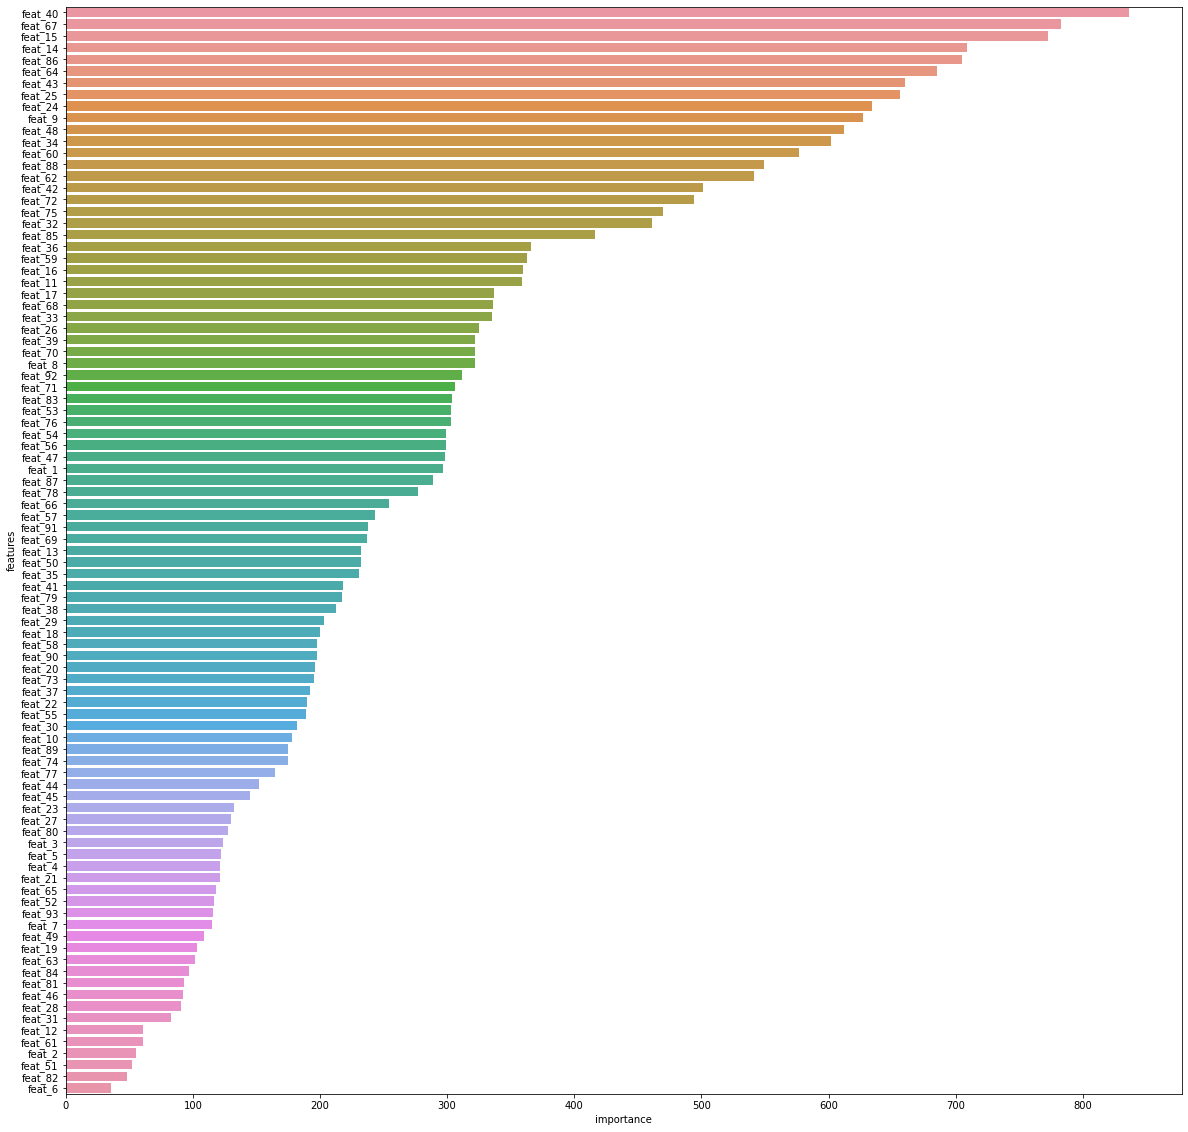

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

importance = pd.DataFrame()
importance["features"] = X_train.columns
importance["importance"] = model2.feature_importances_
importance = importance.sort_values("importance", ascending=False)

plt.figure(figsize=(20,20))
sns.barplot(x="importance", y="features", data=importance);